11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


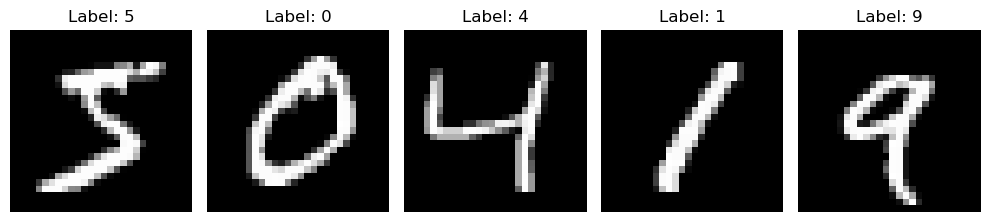

In [6]:
"""
Created on Fri Jul 18 14:09:05 2025

@author: gojef
"""
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape images to vectors (flatten 28x28 to 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1).T  # Shape: (784, 60000)
X_test_flat = X_test.reshape(X_test.shape[0], -1).T     # Shape: (784, 10000)

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes=10):
   one_hot = np.zeros((num_classes, y.size))
   one_hot[y, np.arange(y.size)] = 1
   return one_hot

y_train_one_hot = one_hot_encode(y_train)  # Shape: (10, 60000)
y_test_one_hot = one_hot_encode(y_test)    # Shape: (10, 10000)

# Display sample images
plt.figure(figsize=(10, 5))
for i in range(5):
   plt.subplot(1, 5, i+1)
   plt.imshow(X_train[i], cmap='gray')
   plt.title(f"Label: {y_train[i]}")
   plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_dims, activations):
        self.layer_dims = layer_dims
        self.activations = activations
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        parameters = {}
        for l in range(1, len(self.layer_dims)):
            parameters[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1]) * 0.01
            parameters[f"b{l}"] = np.zeros((self.layer_dims[l], 1))
        return parameters

    def activation(self, Z, func):
        if func == "relu":
            return np.maximum(0, Z)
        elif func == "softmax":
            expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
            return expZ / np.sum(expZ, axis=0, keepdims=True)

    def forward_propagation(self, X):
        A = X
        caches = []
        L = len(self.layer_dims) - 1

        for l in range(1, L + 1):
            W = self.parameters[f"W{l}"]
            b = self.parameters[f"b{l}"]
            Z = np.dot(W, A) + b
            A = self.activation(Z, self.activations[l-1])
            caches.append((Z, A))
        return A, caches


In [22]:
# Define our network architecture
layer_dims = [784, 128, 10]
activations = ["relu", "softmax"]
nn = NeuralNetwork(layer_dims, activations)

# Take a small batch for demonstration
batch_size = 64
batch_indices = np.random.choice(X_train_flat.shape[1], batch_size, replace=False)
X_batch = X_train_flat[:, batch_indices]
y_batch = y_train_one_hot[:, batch_indices]

# Perform forward propagation
output, caches = nn.forward_propagation(X_batch)

# Compute accuracy
predictions = np.argmax(output, axis=0)
true_labels = np.argmax(y_batch, axis=0)
accuracy = np.mean(predictions == true_labels)

print(f"Batch accuracy: {accuracy:.4f}")



Batch accuracy: 0.0469


TypeError: list indices must be integers or slices, not str

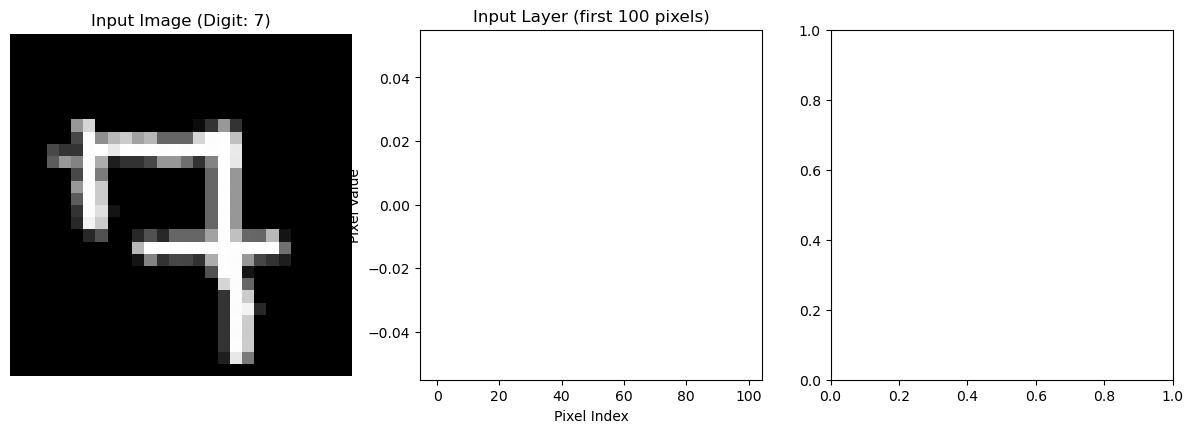

In [30]:
def visualize_network_processing(nn, image, label, caches):
   """Visualize network processing for a single image"""
   plt.figure(figsize=(15, 10))
  
   # Plot original image
   plt.subplot(2, 3, 1)
   plt.imshow(image.reshape(28, 28), cmap='gray')
   plt.title(f"Input Image (Digit: {label})")
   plt.axis('off')
  
   # Plot flattened input (first 100 values)
   plt.subplot(2, 3, 2)
   plt.bar(range(100), image.flatten()[:100])
   plt.title("Input Layer (first 100 pixels)")
   plt.xlabel("Pixel Index")
   plt.ylabel("Pixel Value")
  
   # Plot hidden layer activations (first 50 neurons)
   plt.subplot(2, 3, 3)
   hidden_activations = caches['A1'][:50, 0]
   plt.bar(range(len(hidden_activations)), hidden_activations)
   plt.title("Hidden Layer Activations (first 50 neurons)")
   plt.xlabel("Neuron Index")
   plt.ylabel("Activation")
  
   # Plot output layer activations
   plt.subplot(2, 3, 4)
   output_activations = caches['A2'][:, 0]
   plt.bar(range(10), output_activations)
   plt.xticks(range(10))
   plt.title("Output Layer Activations (Softmax)")
   plt.xlabel("Digit Class")
   plt.ylabel("Probability")
  
   # Plot prediction vs actual
   plt.subplot(2, 3, 5)
   prediction = np.argmax(output_activations)
   plt.bar(['Actual', 'Predicted'], [label, prediction], color=['blue', 'orange'])
   plt.title(f"Prediction: {prediction}, Actual: {label}")
   plt.ylabel("Digit")
  
   plt.tight_layout()
   plt.show()

# Visualize forward propagation for the first image in our batch
image_idx = 0
image = X_batch[:, image_idx].reshape(784, 1)
label = true_labels[image_idx]

visualize_network_processing(nn, image, label, caches)